# Bank Stocks Analysis Project          
by Dev Patel

In this project I will focus on exploratory data analysis of stock prices using NumPy, Pandas, Matplotlib, Seaborn, Plotly, and Cufflinks. I will analyse stocks of a few banks to see how they progressed throughout the [financial crisis of 2007-2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

** NOTE: This analysis is just a practice project by a student and is not meant to be taken as financial advice.**

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Extracting the data from Google Finance API

start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)
# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

In [3]:
# Dropping the irrelevent columns in terms of this project to avoid confusion

BAC.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
WFC.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
C.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
JPM.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
MS.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
GS.drop(['Adj Close', 'Volume'], axis=1, inplace=True)

In [4]:
# Creating a list of ticker symbols for each bank

tickers = ['BAC', 'WFC', 'C', 'JPM', 'MS', 'GS']

In [5]:
# Concatenating all dataframes to a single dataframe along columns

bank_stocks = pd.concat([BAC, WFC, C, JPM, MS, GS], keys=tickers, axis=1)
bank_stocks.head()

BAC                                         WFC             \
                 High        Low       Open      Close       High        Low   
Date                                                                           
2006-01-03  47.180000  46.150002  46.919998  47.080002  31.975000  31.195000   
2006-01-04  47.240002  46.450001  47.000000  46.580002  31.820000  31.365000   
2006-01-05  46.830002  46.320000  46.580002  46.639999  31.555000  31.309999   
2006-01-06  46.910000  46.349998  46.799999  46.570000  31.775000  31.385000   
2006-01-09  46.970001  46.360001  46.720001  46.599998  31.825001  31.555000   

                                           C              ...        JPM  \
                 Open      Close        High         Low  ...       Open   
Date                                                      ...              
2006-01-03  31.600000  31.900000  493.799988  481.100006  ...  39.830002   
2006-01-04  31.799999  31.530001  491.000000  483.500000  ...  39.779999   
2006-01-05  31.500000  31.495001  487.799988  484.000000  ...  39.610001   
2006-01-06  31.580000  31.680000  489.000000  482.000000  ...  39.919998   
2006-01-09  31.674999  31.674999  487.399994  483.000000  ...  39.880001   

                              MS                                           GS  \
                Close       High        Low       Open      Close        High   
Date                                                                            
2006-01-03  40.189999  58.490002  56.740002  57.169998  58.310001  129.440002   
2006-01-04  39.619999  59.279999  58.349998  58.700001  58.349998  128.910004   
2006-01-05  39.740002  58.590000  58.020000  58.549999  58.509998  127.320000   
2006-01-06  40.020000  58.849998  58.049999  58.770000  58.570000  129.250000   
2006-01-09  40.669998  59.290001  58.619999  58.630001  59.189999  130.619995   

                                                
                   Low        Open       Close  
Date                                            
2006-01-03  124.230003  126.699997  128.869995  
2006-01-04  126.379997  127.349998  127.089996  
2006-01-05  125.610001  126.000000  127.040001  
2006-01-06  127.290001  127.290001  128.839996  
2006-01-09  128.000000  128.500000  130.389999  

[5 rows x 24 columns]

In [6]:
# Setting the column level names

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

EXPLORATORY DATA ANALYSIS:

In [7]:
# Maximum Close price for each bank's stock throughout the time period

tickers_ref = {'BAC':'Bank of America', 'WFC':'Wells Fargo', 'C':'Citi Group', 'JPM':'JPMorgan Chase',
               'MS':'Morgan Stanley', 'GS':'Goldman Sachs'}
for bank in tickers:
    print(tickers_ref[bank], bank_stocks[bank]['Close'].max().round(2))

Bank of America 54.9
Wells Fargo 58.52
Citi Group 564.1
JPMorgan Chase 70.08
Morgan Stanley 89.3
Goldman Sachs 247.92


,BAC returns,WFC returns,C returns,JPM returns,MS returns,GS returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.011599,-0.018462,-0.014183,0.000686,-0.013812
2006-01-05,0.001288,-0.001110,0.004961,0.003029,0.002742,-0.000393
2006-01-06,-0.001501,0.005874,0.000000,0.007046,0.001025,0.014169
2006-01-09,0.000644,-0.000158,-0.004731,0.016242,0.010586,0.012030


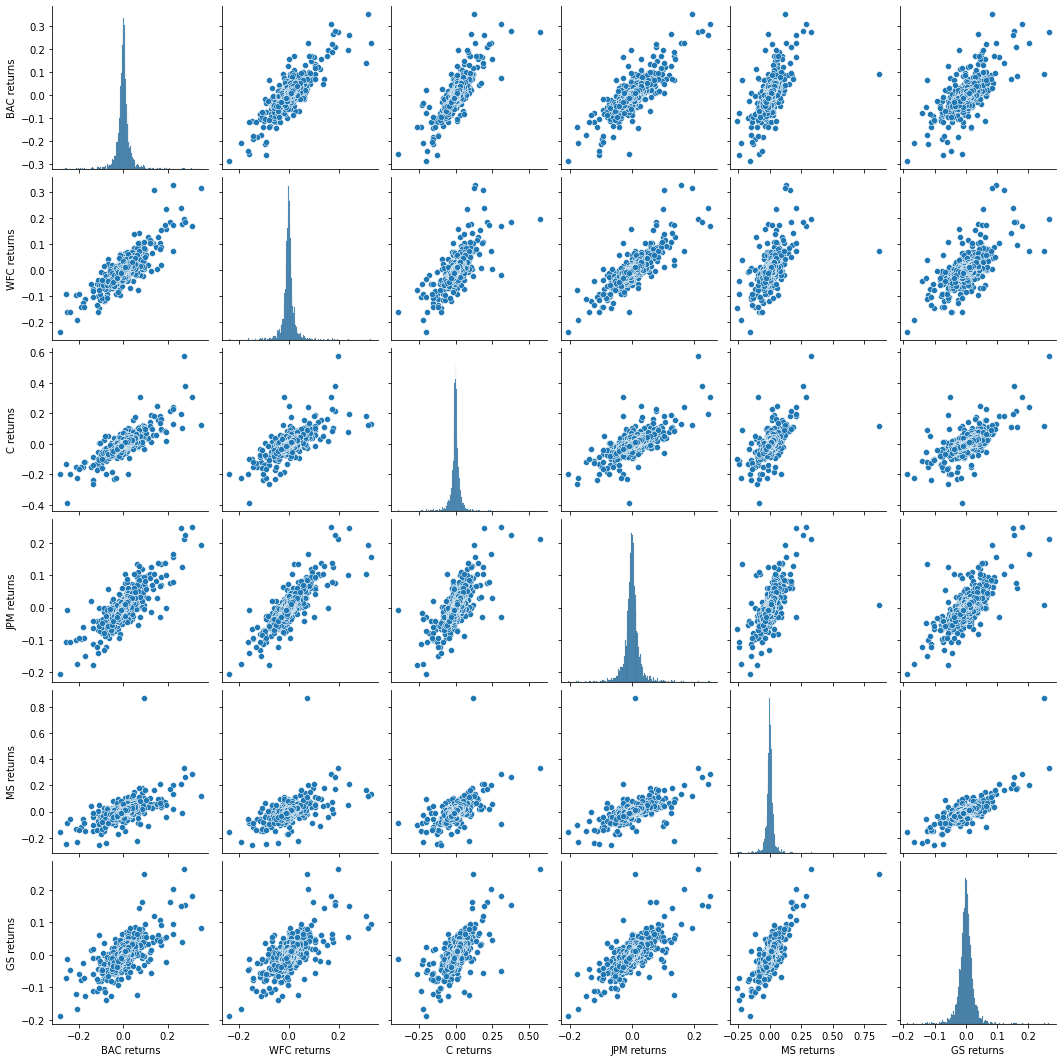

In [8]:
# Stock Returns for each bank throughout the time period

returns = pd.DataFrame()
for bank in tickers:
    returns[bank + ' returns'] = bank_stocks[bank]['Close'].pct_change()

sns.pairplot(returns[1:], diag_kind='hist')
returns.head()

In [9]:
# Dates on which each bank stock had the best and worst single day returns

print('Worst single day returns:')
print(returns.idxmin(),'\n')
print('Best single day returns:')
print(returns.idxmax())

Worst single day returns:
BAC returns   2009-01-20
WFC returns   2009-01-20
C returns     2009-02-27
JPM returns   2009-01-20
MS returns    2008-10-09
GS returns    2009-01-20
dtype: datetime64[ns] 

Best single day returns:
BAC returns   2009-04-09
WFC returns   2008-07-16
C returns     2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
GS returns    2008-11-24
dtype: datetime64[ns]


In [10]:
# Standard deviation of each bank stock returns throughout the time period of 10 years
# **This could help predict the risk of investment**

returns.std()  # C(CitiGroup) riskiest 

BAC returns    0.036647
WFC returns    0.030238
C returns      0.038672
JPM returns    0.027667
MS returns     0.037819
GS returns     0.025390
dtype: float64

In [11]:
# Standard deviation for the year 2008

returns.loc['2008-01-01':'2008-12-31'].std()  # MS(MorganStanley) riskiest

BAC returns    0.062934
WFC returns    0.052439
C returns      0.073523
JPM returns    0.053134
MS returns     0.087604
GS returns     0.050015
dtype: float64

In [12]:
sns.set_style('whitegrid')

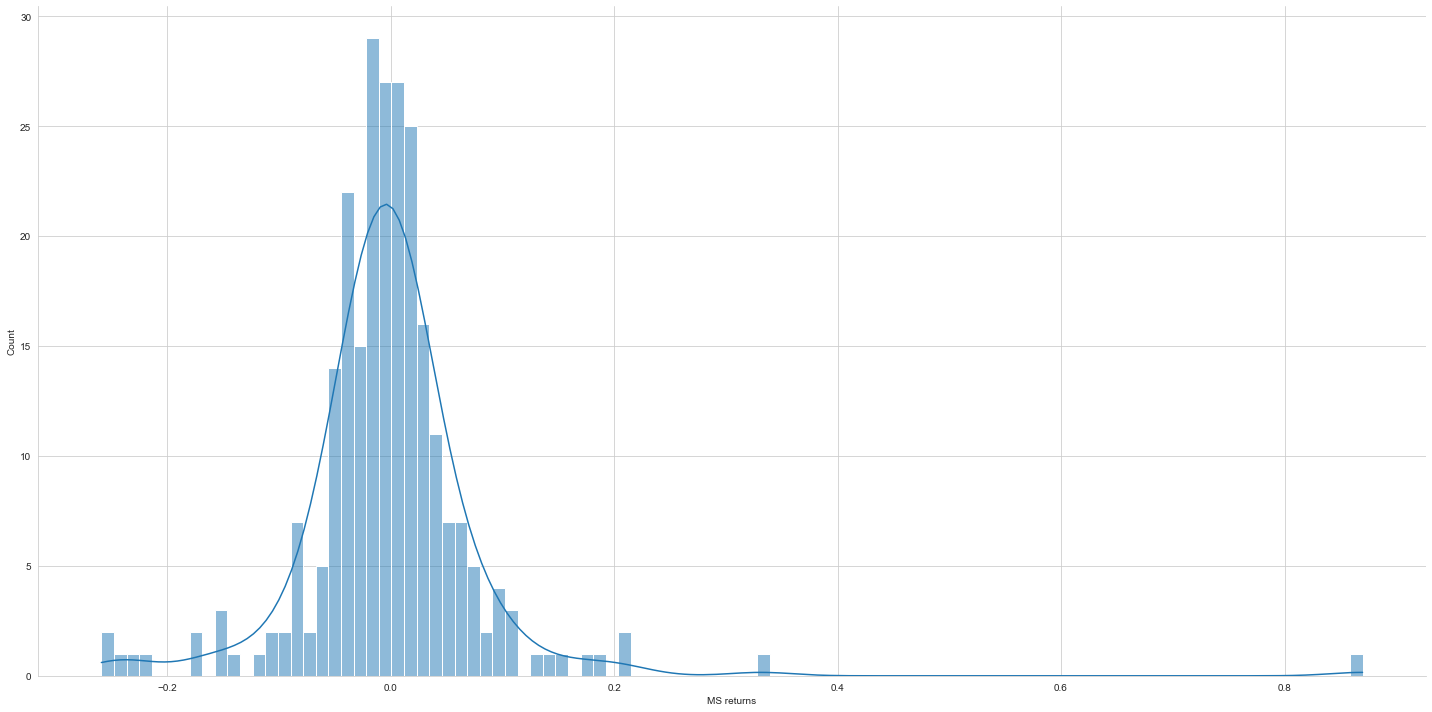

In [13]:
# Plotting 2008 returns for MS

sns.displot(returns.loc['2008-01-01':'2008-12-31']['MS returns'], bins=100, aspect=2, height=10, kde=True)

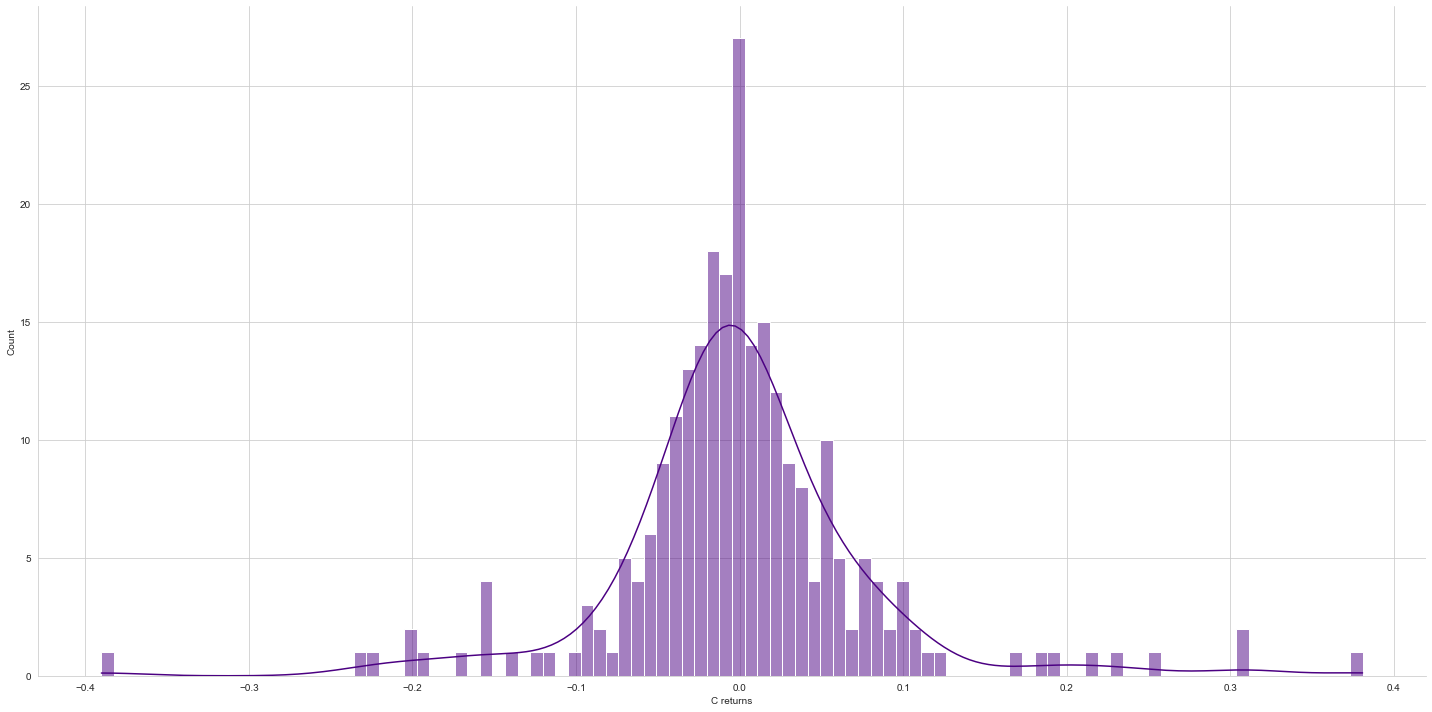

In [14]:
# Plotting 2009 returns for C

sns.displot(returns.loc['2009-01-01':'2009-12-31']['C returns'], color='indigo', bins=100, aspect=2, height=10,
            kde=True)

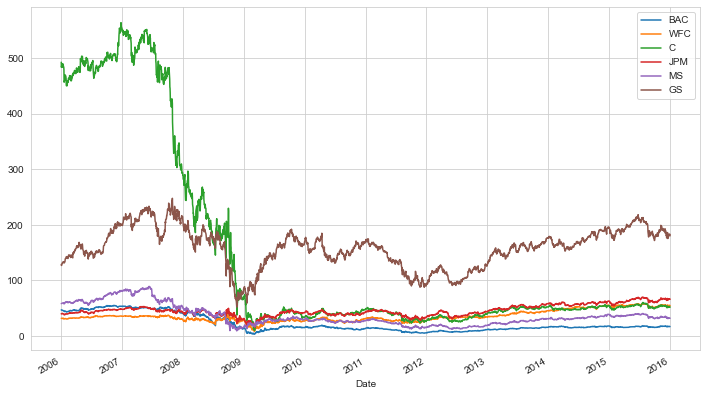

In [15]:
# Close price for each bank for the entire index of time

for bank in tickers:
    bank_stocks[bank]['Close'].plot(figsize=(12,7), label=bank)
plt.legend()

In [16]:
import plotly
import cufflinks as cf
cf.go_offline()

In [17]:
# Plotting an interactive version of the above plot using plotly

bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

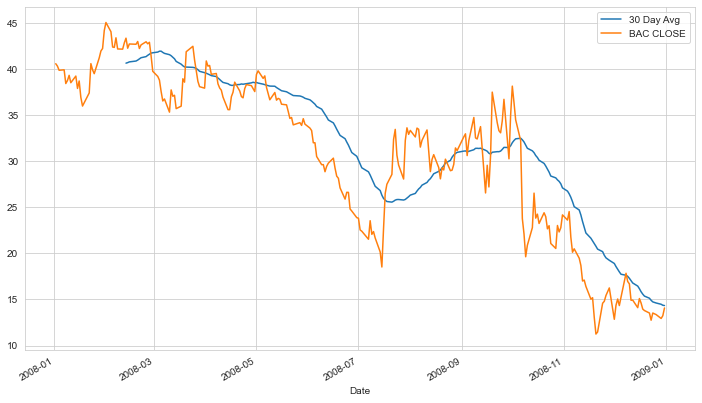

In [18]:
# The rolling 30-day average against the Close Price for BAC's stock for the year 2008

plt.figure(figsize=(12,7))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

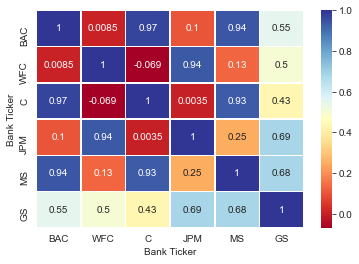

In [19]:
# Creating a heatmap of the correlation b/w stocks Close price

correlation = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.heatmap(correlation, cmap='RdYlBu', annot=True, linewidth=0.5)

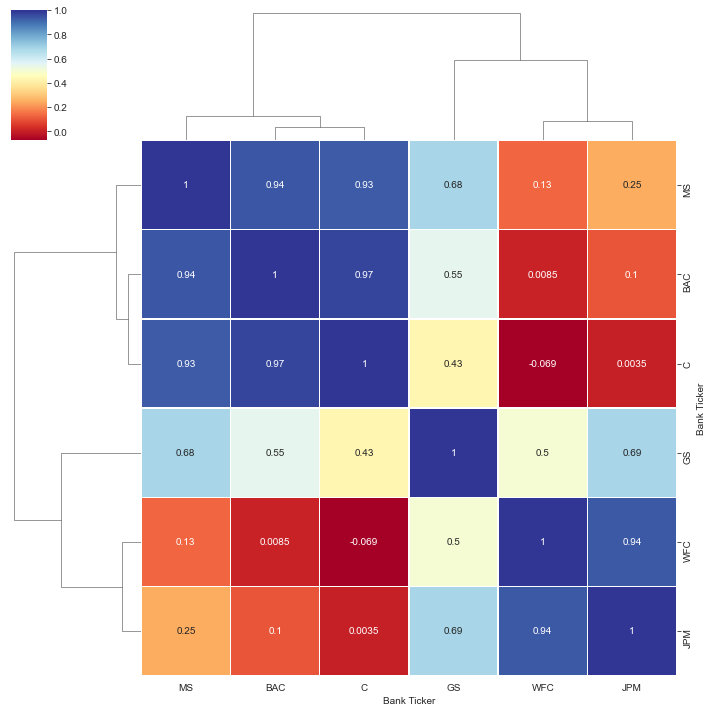

In [27]:
# Clustermap of the above correlation

sns.clustermap(correlation, cmap='RdYlBu', annot=True, linewidth=0.5)

In [21]:
# Interactive plot of the above correlation

correlation.iplot(kind='heatmap',colorscale='rdylbu')

In [22]:
# Creating a CandleStick plot of BAC's 2015 stock using plotly

bac = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac.iplot(kind='candle')

In [23]:
# Creating a Simple Moving Averages plot for MS's 2015 stock

ms = MS['Close'].loc['2015-01-01':'2016-01-01']
ms.ta_plot(study='sma', periods=[13,21,55])

In [24]:
# Creating a Bollinger Band plot for GS's 2015 stock

gs = GS['Close'].loc['2015-01-01':'2016-01-01']
gs.ta_plot(study='boll')